In [1]:
from pyspark import SparkContext
import matplotlib.pyplot as plt

In [2]:
sc = SparkContext()

In [3]:
user_data = sc.textFile('D:\myProject\Spark\PySpark\ml-100k\\u.user')
user_data.first()

'1|24|M|technician|85711'

In [5]:
user_fields = user_data.map(lambda line: line.split('|'))
user_fields.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [7]:
#统计总的用户数
num_user = user_fields.map(lambda fields: fields[0]).count()
#统计性别的种类数，distinct()函数用来去重。
num_genders = user_fields.map(lambda fields:fields[2]).distinct().count()
#统计职位的种类
num_occupation = user_fields.map(lambda fields: fields[3]).distinct().count()
#统计邮编种类
num_zip_codes = user_fields.map(lambda fields: fields[4]).distinct().count()
print("Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_user,num_genders,num_occupation,num_zip_codes))

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


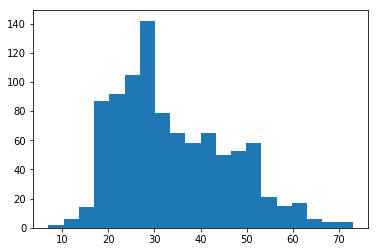

In [8]:
#统计用户年龄
ages = user_fields.map(lambda age: int(age[1])).collect()
#通过python中的matplotlib生成图表提供给分析师分析
plt.hist(ages,bins=20,histtype='bar')

plt.show()
sc.stop()